In [144]:
import pandas as pd; import matplotlib.pyplot as plt; import numpy as np

In [2]:
p1 = pd.read_csv(r"C:\Users\akad\Dropbox\PC\Desktop\DATAFEST\player-6607011.csv")

C:\Users\akad\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (38,39,40,68,70,72,73,74,76,77,78,81,131) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
p1[['player_id', 'event_id', 'stack_id', 'missed_safe_invitations', 'accepted_unsafe_invitations', 'event_category', 'points_lost_gained']].fillna(method='ffill').dropna()

,player_id,event_id,stack_id,missed_safe_invitations,accepted_unsafe_invitations,event_category,points_lost_gained
462,6607011,911,0.0,0.0,0.0,People Sense,9.0
463,6607011,1005,0.0,0.0,0.0,Minigame General,9.0
464,6607011,1001,0.0,0.0,0.0,Minigame General,9.0
465,6607011,1003,0.0,0.0,0.0,Minigame General,9.0
466,6607011,210,0.0,0.0,0.0,Challenge Stack,9.0
...,...,...,...,...,...,...,...
10296,6607011,105,6.0,1.0,2.0,Lifeline,-2.0
10297,6607011,703,6.0,1.0,2.0,Epilogue,-2.0
10298,6607011,1,6.0,1.0,2.0,General,-2.0
10299,6607011,706,6.0,1.0,2.0,Epilogue,-2.0


In [4]:
p1.loc[:, ['stack_id']].fillna(method='ffill').dropna()


,stack_id
14,12.0
15,12.0
16,12.0
17,12.0
18,12.0
...,...
10296,6.0
10297,6.0
10298,6.0
10299,6.0


In [5]:
exporting = p1[14:].to_csv('p6607_stack_id_cleaned_v2.csv', index=True)


In [6]:
q = p1[['player_id', 'event_id', 'stack_id', 'missed_safe_invitations', 'accepted_unsafe_invitations', 'event_category', 'points_lost_gained', 'minigame_level']].fillna(method='ffill').query('event_category == "People Sense"').dropna().query('event_id == 911')

In [7]:
q = q.assign(invitation_danger_level = lambda q: q.missed_safe_invitations + q.accepted_unsafe_invitations); q

,player_id,event_id,stack_id,missed_safe_invitations,accepted_unsafe_invitations,event_category,points_lost_gained,minigame_level,invitation_danger_level
462,6607011,911,0.0,0.0,0.0,People Sense,9.0,0.0,0.0
2794,6607011,911,1.0,1.0,1.0,People Sense,5.0,1.0,2.0
2946,6607011,911,1.0,0.0,0.0,People Sense,-7.0,1.0,0.0
5454,6607011,911,4.0,0.0,2.0,People Sense,9.0,2.0,2.0
5629,6607011,911,4.0,0.0,0.0,People Sense,-11.0,2.0,0.0
7920,6607011,911,4.0,1.0,1.0,People Sense,9.0,2.0,2.0
8048,6607011,911,4.0,0.0,2.0,People Sense,5.0,5.0,2.0
8165,6607011,911,4.0,0.0,0.0,People Sense,9.0,5.0,0.0
8336,6607011,911,4.0,1.0,0.0,People Sense,-2.0,7.0,1.0
8479,6607011,911,4.0,1.0,2.0,People Sense,0.0,8.0,3.0


<AxesSubplot:xlabel='minigame_level'>

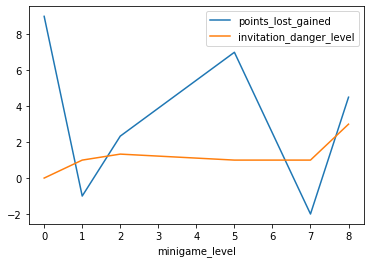

In [8]:
q.groupby('minigame_level').mean().reset_index().plot(x='minigame_level', y=['points_lost_gained', 'invitation_danger_level'])


In [9]:
pa = pd.read_csv(r"C:\Users\akad\Dropbox\PC\Desktop\DATAFEST\logs.csv")

C:\Users\akad\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (34,38,39,40,47,50,53,54,57,58,59,60,62,68,70,72,73,74,76,77,78,81,85,88,89,90,91,92,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,118,120,121,122,123,129,131) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [171]:
Q = pa[['player_id', 'event_id', 'stack_id', 'missed_safe_invitations', 'proportion_complete', 'accepted_unsafe_invitations', 'event_category', 'points_lost_gained', 'minigame_level']].fillna(method='ffill').query('event_category == "People Sense"').query('stack_id != 12').dropna().query('event_id == 911').assign(invitation_danger_level = lambda Q: Q.missed_safe_invitations + Q.accepted_unsafe_invitations); Q #.groupby(pd.cut(pa.proportion_complete, 10))

,player_id,event_id,stack_id,missed_safe_invitations,accepted_unsafe_invitations,event_category,points_lost_gained,minigame_level,invitation_danger_level
333,6427001,911,0.0,0.0,2.0,People Sense,9.0,0.0,2.0
430,6427001,911,0.0,0.0,0.0,People Sense,9.0,0.0,0.0
1092,6427001,911,0.0,0.0,0.0,People Sense,-7.0,0.0,0.0
1169,6427001,911,0.0,0.0,0.0,People Sense,-2.0,0.0,0.0
1243,6427001,911,0.0,0.0,1.0,People Sense,-2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
2104055,65670032,911,4.0,0.0,0.0,People Sense,9.0,2.0,0.0
2104211,65670032,911,4.0,0.0,0.0,People Sense,0.0,5.0,0.0
2104347,65670032,911,4.0,0.0,1.0,People Sense,0.0,7.0,1.0
2104475,65670032,911,4.0,0.0,0.0,People Sense,0.0,7.0,0.0


<AxesSubplot:>

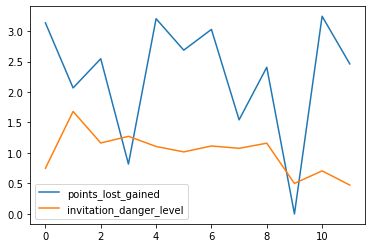

In [11]:
Q.reset_index().plot(y=['points_lost_gained', 'invitation_danger_level'])

avatar_age
11.0    AxesSubplot(0.125,0.125;0.775x0.755)
12.0    AxesSubplot(0.125,0.125;0.775x0.755)
13.0    AxesSubplot(0.125,0.125;0.775x0.755)
14.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: invitation_danger_level, dtype: object

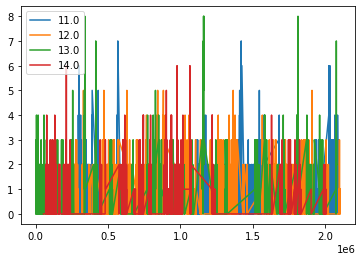

In [12]:
printed = False
pa[['player_id', 'event_id', 'stack_id', 'missed_safe_invitations', 'accepted_unsafe_invitations', 'event_category', 'points_lost_gained', 'minigame_level', 'avatar_age']].fillna(method='ffill').query('event_category == "People Sense"').query('stack_id != 12').dropna().query('event_id == 911').assign(invitation_danger_level = lambda Q: Q.missed_safe_invitations + Q.accepted_unsafe_invitations).groupby('avatar_age')['invitation_danger_level'].plot(y='invitation_danger_level', legend=True)


##['stack_id'].plot(x='stack_id', y='invitation_danger_level')

<AxesSubplot:xlabel='stack_id'>

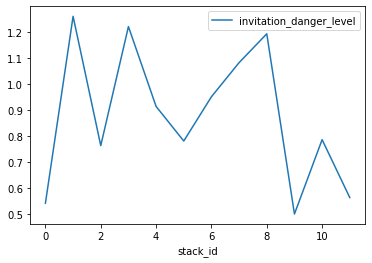

In [13]:
pa[['player_id', 'event_id', 'stack_id', 'missed_safe_invitations', 'accepted_unsafe_invitations', 'event_category', 'points_lost_gained', 'minigame_level', 'avatar_age']].fillna(method='ffill').query('event_category == "People Sense"').query('stack_id != 12').dropna().query('event_id == 911').assign(invitation_danger_level = lambda Q: Q.missed_safe_invitations + Q.accepted_unsafe_invitations).query('avatar_age == 12.0').groupby('stack_id').mean().plot(y='invitation_danger_level')

<AxesSubplot:xlabel='stack_id'>

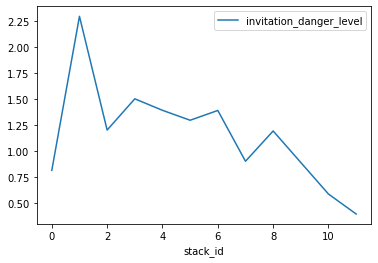

In [14]:
pa[['player_id', 'event_id', 'stack_id', 'missed_safe_invitations', 'accepted_unsafe_invitations', 'event_category', 'points_lost_gained', 'minigame_level', 'avatar_age']].fillna(method='ffill').query('event_category == "People Sense"').query('stack_id != 12').dropna().query('event_id == 911').assign(invitation_danger_level = lambda Q: Q.missed_safe_invitations + Q.accepted_unsafe_invitations).query('avatar_age == 13.0').groupby('stack_id').mean().plot(y='invitation_danger_level')

<AxesSubplot:xlabel='stack_id'>

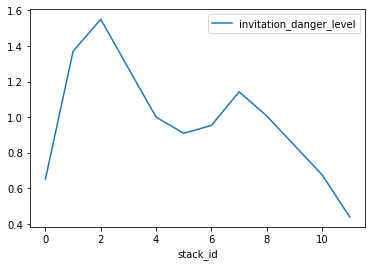

In [15]:
pa[['player_id', 'event_id', 'stack_id', 'missed_safe_invitations', 'accepted_unsafe_invitations', 'event_category', 'points_lost_gained', 'minigame_level', 'avatar_age']].fillna(method='ffill').query('event_category == "People Sense"').query('stack_id != 12').dropna().query('event_id == 911').assign(invitation_danger_level = lambda Q: Q.missed_safe_invitations + Q.accepted_unsafe_invitations).query('avatar_age == 14.0').groupby('stack_id').mean().plot(y='invitation_danger_level')

In [16]:
pa[['player_id', 'event_id', 'stack_id', 'missed_safe_invitations', 'accepted_unsafe_invitations', 'event_category', 'points_lost_gained', 'minigame_level', 'avatar_age']].fillna(method='ffill').query('event_category == "People Sense"').query('stack_id != 12').dropna().query('event_id == 911').assign(invitation_danger_level = lambda Q: Q.missed_safe_invitations + Q.accepted_unsafe_invitations).groupby('avatar_age').nunique()

,player_id,event_id,stack_id,missed_safe_invitations,accepted_unsafe_invitations,event_category,points_lost_gained,minigame_level,invitation_danger_level
avatar_age,,,,,,,,,
11.0,33,1,10,7,3,1,8,10,8
12.0,47,1,12,5,3,1,8,10,6
13.0,43,1,11,8,3,1,8,10,9
14.0,42,1,10,7,3,1,8,10,7


invitation_danger_level    0.33392
dtype: float64
invitation_danger_level    0.512555
dtype: float64
invitation_danger_level    0.269769
dtype: float64
invitation_danger_level    0.467314
dtype: float64


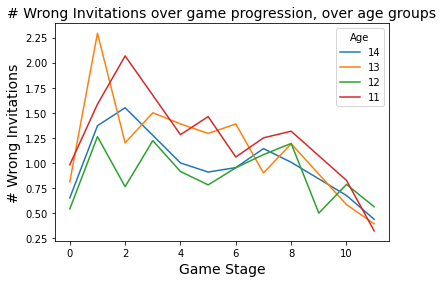

In [17]:
pa_f = pa[['player_id', 'event_id', 'stack_id', 'missed_safe_invitations', 'accepted_unsafe_invitations', 'event_category', 'points_lost_gained', 'minigame_level', 'avatar_age', 'avatar_id']].fillna(method='ffill').query('event_category == "People Sense"').query('stack_id != 12').dropna().query('event_id == 911').assign(invitation_danger_level = lambda Q: Q.missed_safe_invitations + Q.accepted_unsafe_invitations)
pa_14 = pa_f.query('avatar_age == 14.0').groupby('stack_id').mean()[['invitation_danger_level']]; 
pa_13 = pa_f.query('avatar_age == 13.0').groupby('stack_id').mean()[['invitation_danger_level']]; 
pa_12 = pa_f.query('avatar_age == 12.0').groupby('stack_id').mean()[['invitation_danger_level']]; 
pa_11 = pa_f.query('avatar_age == 11.0').groupby('stack_id').mean()[['invitation_danger_level']]; 
plt.plot(pa_14, label=14); plt.plot(pa_13, label=13); plt.plot(pa_12, label=12); plt.plot(pa_11, label=11); plt.legend(title='Age'); plt.ylabel('# Wrong Invitations', fontsize=14); plt.title('# Wrong Invitations over game progression, over age groups', fontsize=14)
plt.xlabel('Game Stage', fontsize=14)
print(pa_14.std())
print(pa_13.std())
print(pa_12.std())
print(pa_11.std())

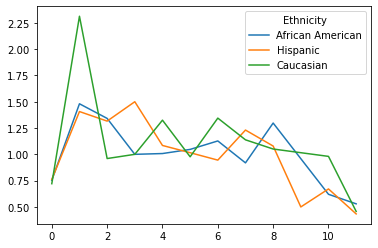

In [18]:
pa_AA = pa_f.query('avatar_id == "African American"').groupby('stack_id').mean()[['invitation_danger_level']]; pa_AA
pa_H = pa_f.query('avatar_id == "Hispanic"').groupby('stack_id').mean()[['invitation_danger_level']]; 
pa_C = pa_f.query('avatar_id == "Caucasian"').groupby('stack_id').mean()[['invitation_danger_level']]; 
plt.plot(pa_AA, label='African American'); plt.plot(pa_H, label='Hispanic'); plt.plot(pa_C, label='Caucasian'); plt.legend(title='Ethnicity')

In [139]:
pa_f = pa[['player_id', 'event_id', 'stack_id', 'proportion_complete', 'missed_safe_invitations', 'accepted_unsafe_invitations', 'event_category', 'points_lost_gained', 'minigame_level', 'avatar_age', 'avatar_id']].fillna(method='bfill').query('(event_category == "People Sense") and (stack_id != 12) and (event_id == 911)').assign(invitation_danger_level = lambda Q: Q.missed_safe_invitations + Q.accepted_unsafe_invitations); pa_f

,player_id,event_id,stack_id,proportion_complete,missed_safe_invitations,accepted_unsafe_invitations,event_category,points_lost_gained,minigame_level,avatar_age,avatar_id,invitation_danger_level
333,6427001,911,0.0,0.00,0.0,2.0,People Sense,-2.0,0.0,13.0,African American,2.0
430,6427001,911,0.0,0.00,0.0,0.0,People Sense,-7.0,0.0,13.0,African American,0.0
1092,6427001,911,0.0,0.00,0.0,0.0,People Sense,-2.0,0.0,13.0,African American,0.0
1169,6427001,911,0.0,0.00,0.0,0.0,People Sense,9.0,0.0,13.0,African American,0.0
1243,6427001,911,0.0,0.00,0.0,1.0,People Sense,-2.0,0.0,13.0,African American,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2104055,65670032,911,4.0,0.36,0.0,0.0,People Sense,9.0,2.0,NaN,NaN,0.0
2104211,65670032,911,4.0,0.36,0.0,0.0,People Sense,-7.0,5.0,NaN,NaN,0.0
2104347,65670032,911,4.0,0.36,0.0,1.0,People Sense,0.0,7.0,NaN,NaN,1.0
2104475,65670032,911,4.0,0.36,0.0,0.0,People Sense,9.0,7.0,NaN,NaN,0.0


<AxesSubplot:xlabel='proportion_complete'>

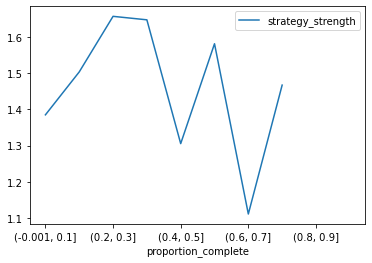

In [160]:
pa_fr = pa[['player_id', 'event_id', 'proportion_complete', 'avatar_age', 'avatar_id', 'event_category', 'strategy_strength']].fillna(method='ffill').fillna(method='bfill').query('(event_category == "Refuse Power Minigame") and (event_id == 509)')
pa_fr.groupby(pd.cut(pa_fr.proportion_complete, 10)).mean().plot(y='strategy_strength')
#pa_fr.groupby(pd.cut(pa['proportion_complete'], np.linspace(0, 1, 11)))['feet'].mean()


Text(0.5, 0, 'Game Stage')

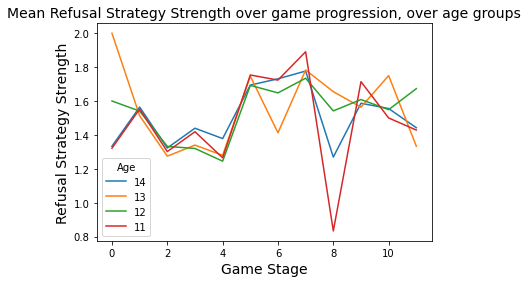

In [73]:
par_11 = pa_fr.query('avatar_age == 11.0').groupby('stack_id').mean()[['strategy_strength']]
par_12 = pa_fr.query('avatar_age == 12.0').groupby('stack_id').mean()[['strategy_strength']]
par_13 = pa_fr.query('avatar_age == 13.0').groupby('stack_id').mean()[['strategy_strength']]
par_14 = pa_fr.query('avatar_age == 14.0').groupby('stack_id').mean()[['strategy_strength']]

plt.plot(par_14, label=14); plt.plot(par_13, label=13); plt.plot(par_12, label=12); plt.plot(par_11, label=11); plt.legend(title='Age'); plt.ylabel('Refusal Strategy Strength', fontsize=14); plt.title('Mean Refusal Strategy Strength over game progression, over age groups', fontsize=14)
plt.xlabel('Game Stage', fontsize=14)

Text(0.5, 0, 'Game Stage')

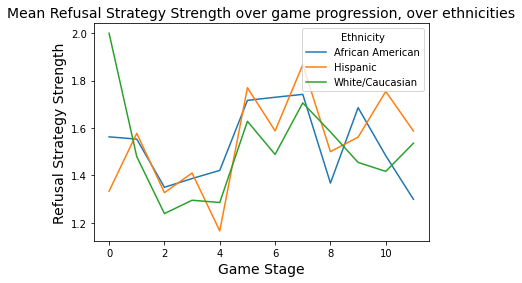

In [75]:
par_AA = pa_fr.query('avatar_id == "African American"').groupby('stack_id').mean()[['strategy_strength']]
par_H = pa_fr.query('avatar_id == "Hispanic"').groupby('stack_id').mean()[['strategy_strength']]
par_W = pa_fr.query('avatar_id == "Caucasian"').groupby('stack_id').mean()[['strategy_strength']]

plt.plot(par_AA, label='African American'); plt.plot(par_H, label='Hispanic'); plt.plot(par_W, label='White/Caucasian'); plt.legend(title='Ethnicity'); plt.ylabel('Refusal Strategy Strength', fontsize=14); plt.title('Mean Refusal Strategy Strength over game progression, over ethnicities', fontsize=14)
plt.xlabel('Game Stage', fontsize=14)

In [77]:
s5 = pd.read_csv(r"C:\Users\akad\Dropbox\PC\Desktop\DATAFEST\S5_scores_cleaned.csv"); s5

,player_id,weeks,S5_mean
0,6427001.0,0,3.900
1,6427001.0,3,3.900
2,6427001.0,6,3.875
3,6427027.0,0,3.800
4,6427027.0,3,4.000
...,...,...,...
235,NaN,3,4.000
236,NaN,6,3.500
237,NaN,6,4.000
238,NaN,12,4.000


In [85]:
s5.dropna().groupby('weeks').mean()[['S5_mean']]

,S5_mean
weeks,
0,3.820968
3,3.858333
6,3.857292
12,3.877778
24,3.862963


<AxesSubplot:ylabel='Frequency'>

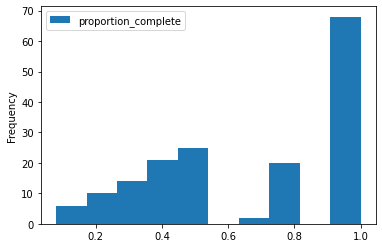

In [137]:
pa[['player_id', 'proportion_complete']].fillna(method='ffill').fillna(method='bfill').groupby('player_id').max().plot.hist()

<AxesSubplot:ylabel='Frequency'>

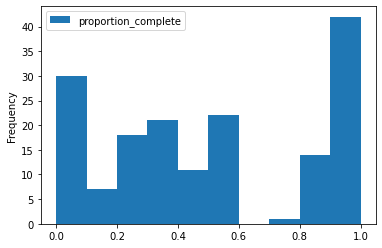

In [138]:
pa[['player_id', 'proportion_complete', 'event_category']].query('event_category == "Epilogue"').groupby('player_id').max().plot.hist()